# Mount the Google Drive


In [53]:
# connecting to drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Install Necessery Library

In [54]:
!pip install opencv-python
!pip install xgboost

#Import Library

In [55]:
# Importing Required library's
# Ignoring Warning
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import os
from keras.callbacks import Callback
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
import tensorflow as tf
from tensorflow import keras
from keras.models import load_model
from sklearn.metrics import roc_curve, auc
import time
from tensorflow.keras.applications.efficientnet_v2 import EfficientNetV2B1,preprocess_input,EfficientNetV2B3
from tensorflow.keras.preprocessing import image
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.applications.mobilenet import preprocess_input
print("All Library Loaded sucessfully to this notebook instance")

All Library Loaded sucessfully to this notebook instance


# Model Evaluation

In [56]:
#Empty df for result
col = ["Algorithm","Accuracy","Error rate","Precision","Recall","F1 score"]
result_df = pd.DataFrame(columns = col)

In [57]:
#Model_Eval Function
def model_Eval(algo_name,y_test,y_pred):

    acc=100*(accuracy_score(y_test,y_pred))
    er=(1-accuracy_score(y_test,y_pred))*100
    pre=precision_score(y_test,y_pred,average='weighted')*100
    re=recall_score(y_test,y_pred,average='weighted')*100
    f1=f1_score(y_test,y_pred,average='weighted')*100

    print("Accuracy of {0} :-> {1:.2f} ".format(algo_name,acc))
    print("Error rate of {0}:-> {1:.2f} ".format(algo_name,er))
    print("Precision of {0}:-> {1:.2f} ".format(algo_name,pre))
    print("Recall of {0}:-> {1:.2f}".format(algo_name,re))
    print("F1 score of {0} :-> {1:.2f}".format(algo_name,f1))

    print(classification_report(y_test, y_pred))

    # Confusion matrix
    cm=confusion_matrix(y_test,y_pred)
    tn=cm[0][0]
    fp=cm[0][1]
    fn=cm[1][0]
    tp=cm[1][1]
    plt.figure(figsize=(10,5))
    sns.heatmap(cm,annot=True,cmap="YlGnBu",fmt=".1f")
    plt.xlabel('Predicted')
    plt.ylabel("Actual")

    result_df.loc[len(result_df)] = [algo_name,acc,er,pre,re,f1]

In [58]:
def curve_plot(y_test,y_score):
    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

#Feature Extraction for Extraction Image Features

In [59]:
# Load EfficientNetV2B3 model

model = EfficientNetV2B3(weights='imagenet', include_top=False)

# Function to extract features from an image
def extract_features(img):
    # img = cv2.imread(img_path)
    img = cv2.resize(img, (224, 224))  # Resize images to 224x224
    img = img / 255.0  # Normalize pixel values to the range [0, 1]
    img = np.expand_dims(img, axis=0)  # Add batch dimension
    img = preprocess_input(img)

    # Extract features using EfficientNetV2B3
    features = model.predict(img)
    return features.flatten()

print("EfficientNetV2B3 Model loaded sucessfully")

EfficientNetV2B3 Model loaded sucessfully


In [60]:
input_dir= "/content/drive/My Drive/Brain Tumour Detection/Dataset/Binary"

# Create a list of class names
class_names = ['Yes','No']

class_labels = {class_name: label for label, class_name in enumerate(class_names)}

# Initialize lists to store image data and corresponding labels
images = []
labels = []
count = 1
# Load and preprocess images
for class_name in class_names:
    print("=========== Extracting Features for {}".format(class_name),"===========")
    class_dir = os.path.join(input_dir, class_name)
    for filename in os.listdir(class_dir):
        image_path = os.path.join(class_dir, filename)

        img = cv2.imread(image_path)
        if img is None:
          continue
        else:
            features = extract_features(img)
            images.append(features)
            labels.append(class_name)
        print(count , class_name)
        count+=1

=========== Extracting Features for Yes ===========
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step
1 Yes
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
2 Yes
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
3 Yes
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
4 Yes
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
5 Yes
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
6 Yes
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
7 Yes
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
8 Yes
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
9 Yes
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
10 Yes
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
11 Yes
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
12 Yes
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
13 Yes
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
14 Yes
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
15 Yes
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
16 Yes
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
17 Yes
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
18 Yes
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
19 Yes
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
20 Yes
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
21 Yes
1/1 ━━━━━━━━━━

In [61]:
from collections import Counter
Counter(labels)

Counter({'Yes': 155, 'No': 98})

In [62]:
import pandas as pd
feature_train = pd.DataFrame(images, columns=[f"Feature_{i}" for i in range(len(images[0]))])
feature_train["Labels"] = labels
feature_train.to_csv('/content/drive/My Drive/Brain Tumour Detection/Dataset/feature_binary.csv', index=False)
print("EfficientNetV2B3 feature of images saved..!")

EfficientNetV2B3 feature of images saved..!


# Cheaking Data Balancing

In [63]:
from collections import Counter
Counter(labels)

Counter({'Yes': 155, 'No': 98})

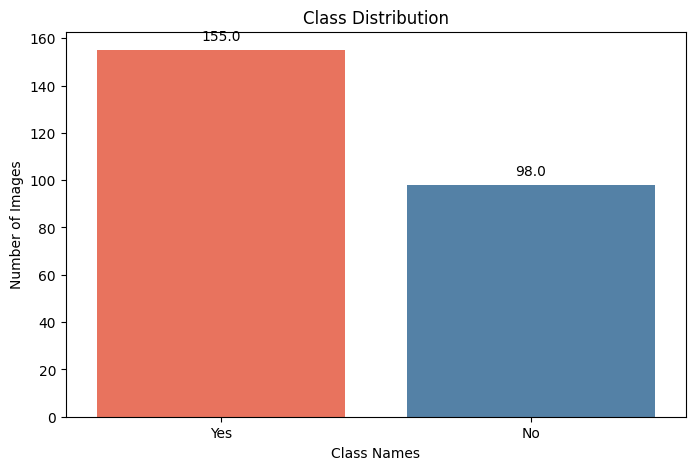

In [64]:
count_list = feature_train['Labels'].value_counts()
class_names = ['Yes', 'No']

# Define colors for each bar
colors = ['#FF6347', '#4682B4']  # Customize the colors as needed

plt.figure(figsize=(8, 5))

# Create the bar plot with specified colors
a = sns.barplot(x=class_names, y=count_list, palette=colors)

# Annotate each bar with its count
for p in a.patches:
    a.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
               ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('Class Distribution')
plt.xlabel('Class Names')
plt.ylabel('Number of Images')
plt.show()

# Dataset Balancing


In [65]:
# Dataset Spiltting
X = feature_train.drop('Labels',axis = 1)
y = feature_train['Labels']

In [66]:
#Over Sampling
from imblearn.over_sampling import RandomOverSampler
over_model = RandomOverSampler(random_state=0)
X_over , y_over = over_model.fit_resample(X,y)
print(X_over.shape)
print(y_over.shape)
print(y_over.value_counts())
X = pd.DataFrame(X_over)
y = y_over

(310, 75264)
(310,)
Labels
Yes    155
No     155
Name: count, dtype: int64


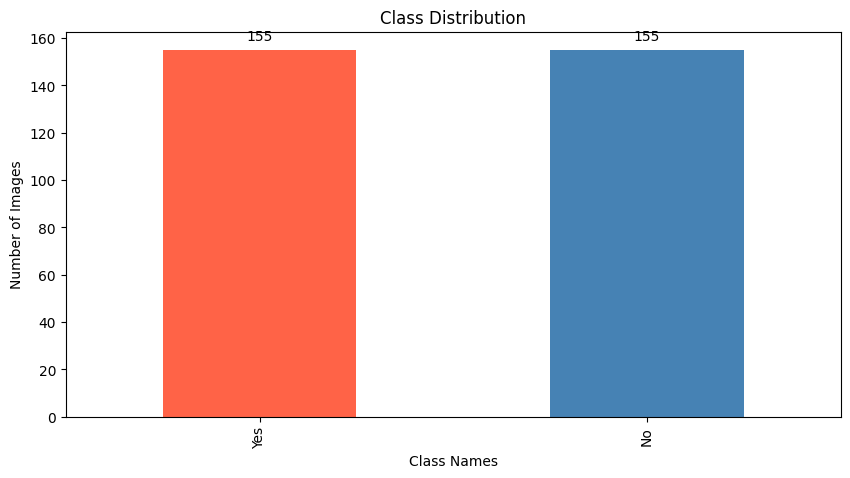

In [67]:
# Convert the dictionary to a Pandas Series
series = pd.Series(dict(Counter(y)))

# Define colors for each bar
colors = ['#FF6347', '#4682B4']  # Customize the colors as needed

# Plot the Series
fig, ax = plt.subplots(figsize=(10, 5))
bars = series.plot(kind='bar', color=colors, ax=ax)

# Annotate each bar with its count
for bar in bars.patches:
    ax.annotate(f'{bar.get_height()}',
                (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('Class Distribution')
plt.xlabel('Class Names')
plt.ylabel('Number of Images')
plt.show()

# Encodding the Output column

In [68]:
#Encode output label
# Encode labels from 'No' and 'Yes' to 0 and 1
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
print("Label Encoding Completed")

Label Encoding Completed


# Dataset Splitting for Training and Testing

In [69]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42,stratify=y)
print("Dataset Split sucessfully sucessufully into train and test!!")

Dataset Split sucessfully sucessufully into train and test!!


In [70]:
print("X_train :- ",X_train.shape)
print("X_test :- ",X_test.shape)
print("y_train :- ",y_train.shape)
print("y_test :- ",y_test.shape)

X_train :-  (248, 75264)
X_test :-  (62, 75264)
y_train :-  (248,)
y_test :-  (62,)


# Transfer Learning-Machine Learning Model Training

Model Created !!!
Model Traning Completed
KNN model train sucessfully in :  0.0 Minutes 2 Seconds
Accuracy of K-Nearest Neighbor Algorithm :-> 72.58 
Error rate of K-Nearest Neighbor Algorithm:-> 27.42 
Precision of K-Nearest Neighbor Algorithm:-> 73.18 
Recall of K-Nearest Neighbor Algorithm:-> 72.58
F1 score of K-Nearest Neighbor Algorithm :-> 72.40
              precision    recall  f1-score   support

           0       0.69      0.81      0.75        31
           1       0.77      0.65      0.70        31

    accuracy                           0.73        62
   macro avg       0.73      0.73      0.72        62
weighted avg       0.73      0.73      0.72        62



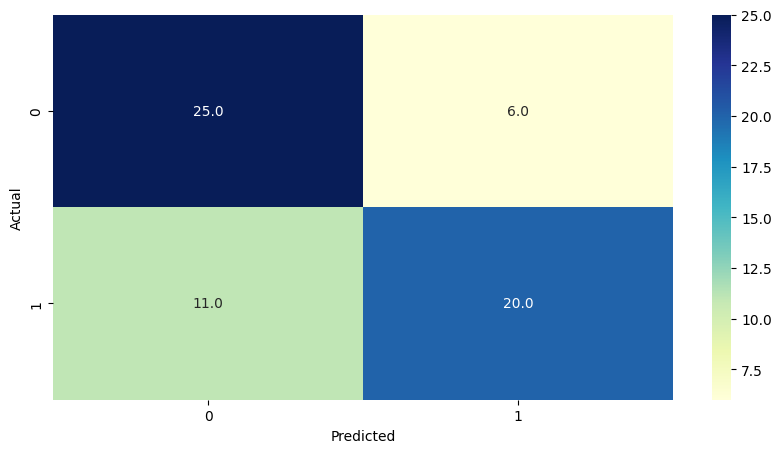

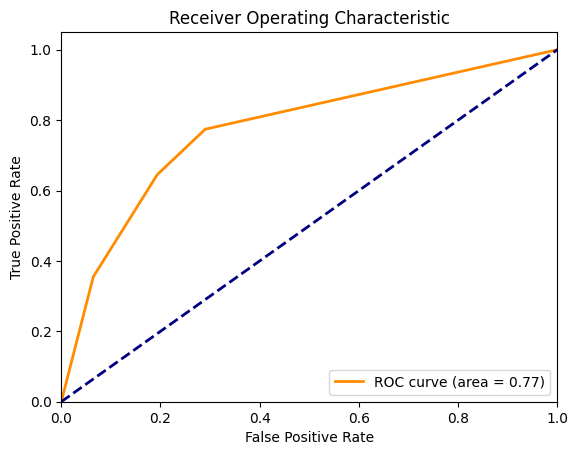

In [71]:
# #Create A model K = 3 , distance = manhattan_distance
from sklearn.neighbors import KNeighborsClassifier

KNN_model = KNeighborsClassifier(n_neighbors=3,p=1)
print("Model Created !!!")

start_training = time.time()

#model traning
KNN_model.fit(X_train,y_train)
print("Model Traning Completed")

end_training = time.time()
total_training_time = end_training-start_training
print("KNN model train sucessfully in : ",total_training_time//60, "Minutes", round(total_training_time%60),"Seconds")

y_pred=KNN_model.predict(X_test)

#model Evaluation
model_Eval('K-Nearest Neighbor Algorithm',y_test,y_pred)

#ROC curve
y_score = KNN_model.predict_proba(X_test)[:, 1]
curve_plot(y_test,y_score)

Model Created !!!
Model Traning Completed
Logistic Regression model train sucessfully in :  0.0 Minutes 2 Seconds
Accuracy of Logistic Regression Algorithm :-> 50.00 
Error rate of Logistic Regression Algorithm:-> 50.00 
Precision of Logistic Regression Algorithm:-> 25.00 
Recall of Logistic Regression Algorithm:-> 50.00
F1 score of Logistic Regression Algorithm :-> 33.33
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        31
           1       0.50      1.00      0.67        31

    accuracy                           0.50        62
   macro avg       0.25      0.50      0.33        62
weighted avg       0.25      0.50      0.33        62



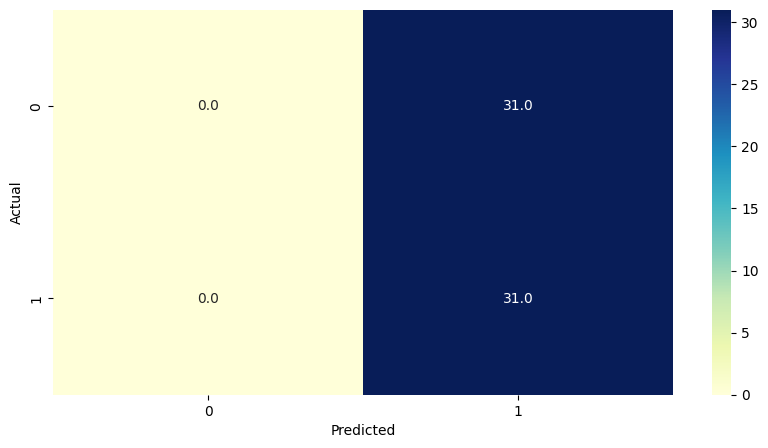

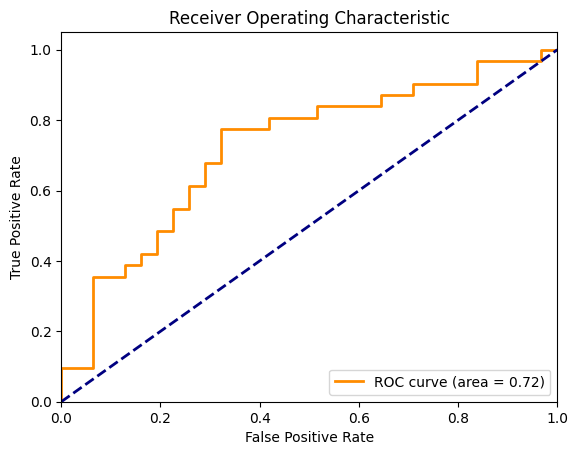

In [72]:
# LogisticRegression
from sklearn.linear_model import LogisticRegression
LR_Model=LogisticRegression()
print("Model Created !!!")

start_training = time.time()

#model traning
LR_Model.fit(X_train,y_train)
print("Model Traning Completed")

end_training = time.time()
total_training_time = end_training-start_training
print("Logistic Regression model train sucessfully in : ",total_training_time//60, "Minutes", round(total_training_time%60),"Seconds")

#find t y_pred
y_pred=LR_Model.predict(X_test)

# LR Eval
model_Eval('Logistic Regression Algorithm',y_test,y_pred)

#ROC curve
y_score = LR_Model.predict_proba(X_test)[:, 1]
curve_plot(y_test,y_score)

Model Created !!!
Model Traning Completed
GaussianNB model train sucessfully in :  0.0 Minutes 2 Seconds
Accuracy of GaussianNB Algorithm :-> 67.74 
Error rate of GaussianNB Algorithm:-> 32.26 
Precision of GaussianNB Algorithm:-> 68.43 
Recall of GaussianNB Algorithm:-> 67.74
F1 score of GaussianNB Algorithm :-> 67.44
              precision    recall  f1-score   support

           0       0.65      0.77      0.71        31
           1       0.72      0.58      0.64        31

    accuracy                           0.68        62
   macro avg       0.68      0.68      0.67        62
weighted avg       0.68      0.68      0.67        62



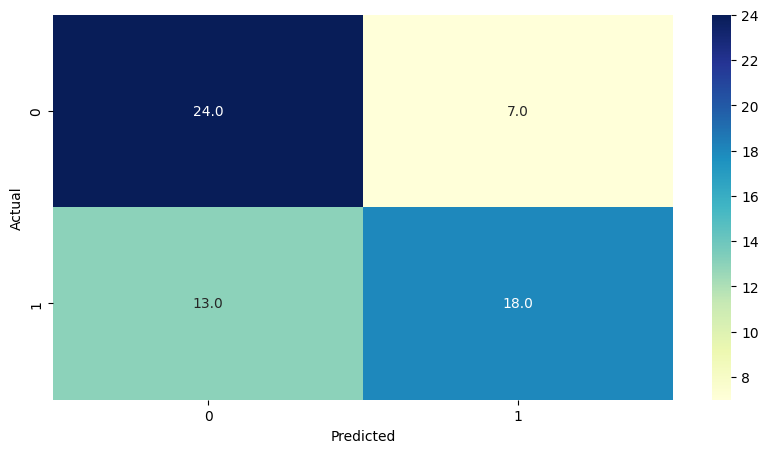

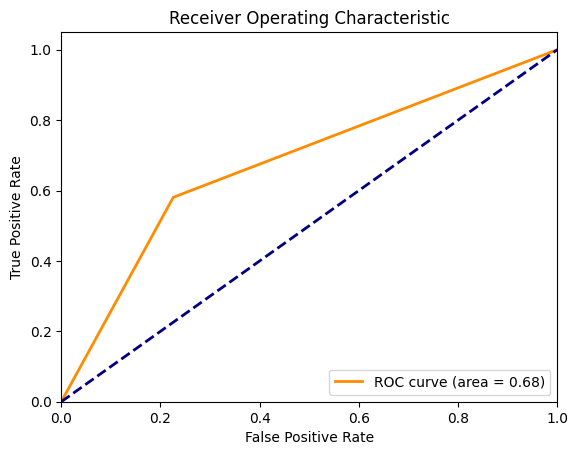

In [73]:
# GaussianNB
from sklearn.naive_bayes import GaussianNB

GB_Model=GaussianNB()
print("Model Created !!!")

start_training = time.time()

#model traning
GB_Model.fit(X_train,y_train)
print("Model Traning Completed")

end_training = time.time()
total_training_time = end_training-start_training
print("GaussianNB model train sucessfully in : ",total_training_time//60, "Minutes", round(total_training_time%60),"Seconds")

y_pred=GB_Model.predict(X_test)

# Eval
model_Eval("GaussianNB Algorithm",y_test,y_pred)

#ROC curve
y_score = GB_Model.predict_proba(X_test)[:, 1]
curve_plot(y_test,y_score)


Model Created !!!
Model Traning Completed
RandomForestClassifier model train sucessfully in :  0.0 Minutes 3 Seconds
Accuracy of Random Forest Algorithm :-> 85.48 
Error rate of Random Forest Algorithm:-> 14.52 
Precision of Random Forest Algorithm:-> 85.52 
Recall of Random Forest Algorithm:-> 85.48
F1 score of Random Forest Algorithm :-> 85.48
              precision    recall  f1-score   support

           0       0.84      0.87      0.86        31
           1       0.87      0.84      0.85        31

    accuracy                           0.85        62
   macro avg       0.86      0.85      0.85        62
weighted avg       0.86      0.85      0.85        62



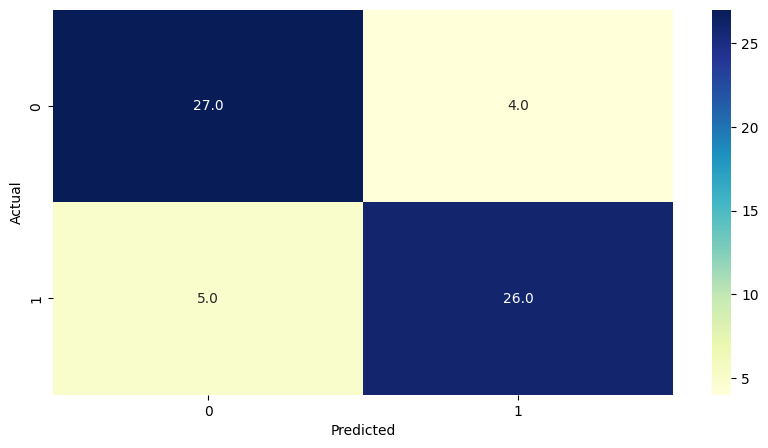

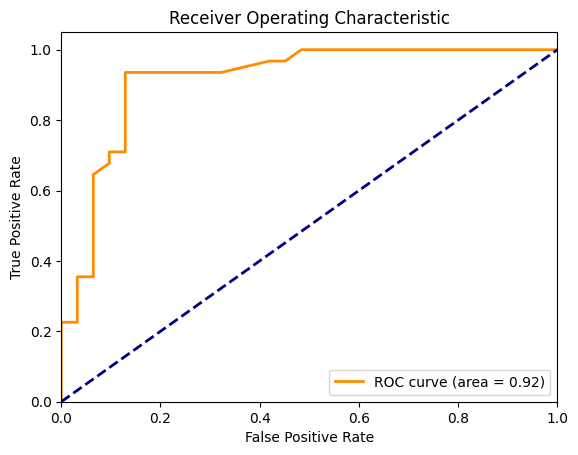

In [74]:
#RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
# model creation
RFC_Model=RandomForestClassifier()
print("Model Created !!!")

start_training = time.time()
#model traning
RFC_Model.fit(X_train,y_train)
print("Model Traning Completed")

end_training = time.time()
total_training_time = end_training-start_training
print("RandomForestClassifier model train sucessfully in : ",total_training_time//60, "Minutes", round(total_training_time%60),"Seconds")

y_pred=RFC_Model.predict(X_test)

# model evaluation
model_Eval('Random Forest Algorithm',y_test,y_pred)

#ROC curve
y_score = RFC_Model.predict_proba(X_test)[:, 1]
curve_plot(y_test,y_score)

# Hyperparameter Tunning

##RandomizedSearchCV

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Parameters: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': 10}
Best Score: 0.8307755102040815
RandomForestClassifier model train sucessfully in :  2.0 Minutes 35 Seconds
Accuracy of RandomForestClassifier Algorithm Hyperparameter :-> 87.10 
Error rate of RandomForestClassifier Algorithm Hyperparameter:-> 12.90 
Precision of RandomForestClassifier Algorithm Hyperparameter:-> 87.10 
Recall of RandomForestClassifier Algorithm Hyperparameter:-> 87.10
F1 score of RandomForestClassifier Algorithm Hyperparameter :-> 87.10
              precision    recall  f1-score   support

           0       0.87      0.87      0.87        31
           1       0.87      0.87      0.87        31

    accuracy                           0.87        62
   macro avg       0.87      0.87      0.87        62
weighted avg       0.87      0.87      0.87        62



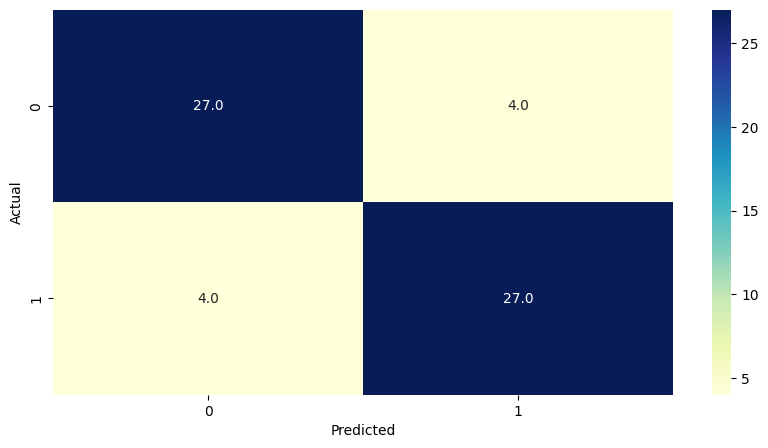

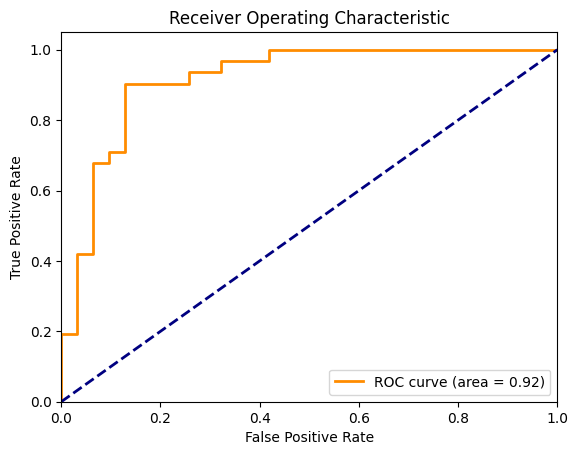

In [75]:
from sklearn.model_selection import RandomizedSearchCV

# Define the parameter distributions to sample from
param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# Create a Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Perform randomized search with cross-validation
random_search = RandomizedSearchCV(estimator=rf_model, param_distributions=param_dist, n_iter=10, cv=5,
                                   scoring='accuracy', verbose=2, n_jobs=-1, random_state=42)
start_training = time.time()

random_search.fit(X_train, y_train)

# Get the best parameters and the best score
best_params = random_search.best_params_
best_score = random_search.best_score_
print("Best Parameters:", best_params)
print("Best Score:", best_score)

# Train the model with best parameters
best_model = random_search.best_estimator_

end_training = time.time()
total_training_time = end_training-start_training
print("RandomForestClassifier model train sucessfully in : ",total_training_time//60, "Minutes", round(total_training_time%60),"Seconds")


# Evaluate the model with best parameters on the test set
y_pred = best_model.predict(X_test)
# RF Eval
model_Eval('RandomForestClassifier Algorithm Hyperparameter',y_test,y_pred)

#ROC curve
y_score = best_model.predict_proba(X_test)[:, 1]
curve_plot(y_test,y_score)

In [76]:
import joblib
joblib.dump(best_model, '/content/drive/My Drive/Brain Tumour Detection/Models/RandomForest_model_hyperpameter.pkl')

['/content/drive/My Drive/Brain Tumour Detection/Models/RandomForest_model_hyperpameter.pkl']

# Save Result dataframe

In [77]:
result_df.to_csv("/content/drive/My Drive/Brain Tumour Detection/Dataset/result_df_final.csv",
                 index=False)
result_df

,Algorithm,Accuracy,Error rate,Precision,Recall,F1 score
0,K-Nearest Neighbor Algorithm,72.580645,27.419355,73.183761,72.580645,72.401152
1,Logistic Regression Algorithm,50.000000,50.000000,25.000000,50.000000,33.333333
2,GaussianNB Algorithm,67.741935,32.258065,68.432432,67.741935,67.436975
3,Random Forest Algorithm,85.483871,14.516129,85.520833,85.483871,85.480094
4,RandomForestClassifier Algorithm Hyperparameter,87.096774,12.903226,87.096774,87.096774,87.096774
